In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
data_dir = '/scratch/aew492/research-summer2020_output/'
grad_dir = os.path.join(data_dir, 'gradient/1D/')

In [3]:
cat_tag = 'L750_n1e-4_z057_patchy_As2x'
rlz = 1

n_mocks = 401

## plots of sliced mock catalog

In [4]:
# m = 0
mock_info_m0 = np.load(os.path.join(grad_dir, f'mock_data/{cat_tag}/cat_{cat_tag}_lognormal_rlz{rlz}_m-0.000-L_b-0.500.npy'), allow_pickle=True).item()
mock_set_m0 = mock_info_m0['grad_set']
ln_set_m0 = mock_info_m0['lognorm_set']

In [5]:
mock_set_m0.shape, ln_set_m0.shape

((43151, 3), (3, 43167))

In [6]:
# m = 1
mock_info_m1 = np.load(os.path.join(grad_dir, f'mock_data/{cat_tag}/cat_{cat_tag}_lognormal_rlz{rlz}_m-1.000-L_b-0.500.npy'), allow_pickle=True).item()
mock_set_m1 = mock_info_m1['grad_set']
ln_set_m1 = mock_info_m1['lognorm_set']

In [7]:
mock_set_m1.shape, ln_set_m1.shape

((42951, 3), (3, 43167))

In [8]:
# slices
z_max = 100

xy_slice_m0 = mock_set_m0[np.where(mock_set_m0[:,2] < z_max)] # select rows where z < z_max
xy_slice_m1 = mock_set_m1[np.where(mock_set_m1[:,2] < z_max)]

Text(0.5, 1.0, 'L750_n1e-4_z057_patchy_As2x, m = 1, b = 0.5')

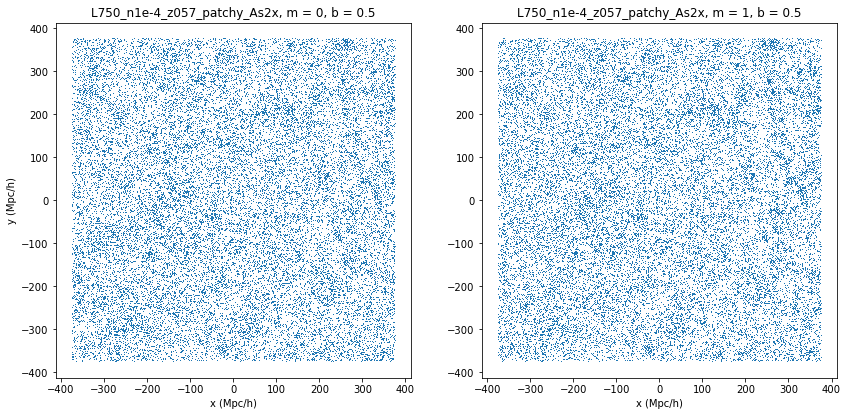

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,10))

ax1.plot(xy_slice_m0[:,0], xy_slice_m0[:,1],',')   # plot scatter xy-slice
ax2.plot(xy_slice_m1[:,0], xy_slice_m1[:,1],',')   # plot scatter xy-slice
for ax in [ax1, ax2]:
    ax.set_aspect('equal')      # square aspect ratio
    ax.set_xlabel("x (Mpc/h)")
ax1.set_ylabel("y (Mpc/h)")
ax1.set_title(f'{cat_tag}, m = 0, b = 0.5')
ax2.set_title(f'{cat_tag}, m = 1, b = 0.5')

## binned correlation function

In [10]:
# lognormal
ls_ln = np.load(os.path.join(data_dir, f'lognormal/xi/ls/{cat_tag}/xi_cat_{cat_tag}_lognormal_rlz{rlz}.npy'), allow_pickle=True)
ls_ln.shape

(2, 22)

In [11]:
# m = 0
ls_m0 = np.load(os.path.join(grad_dir, f'ls/{cat_tag}/xi_ls_3x_cat_{cat_tag}_lognormal_rlz{rlz}_m-0.000-L_b-0.500.npy'), allow_pickle=True)
ls_m0.shape

(2, 22)

In [12]:
# m = 1
ls_m1 = np.load(os.path.join(grad_dir, f'ls/{cat_tag}/xi_ls_3x_cat_{cat_tag}_lognormal_rlz{rlz}_m-1.000-L_b-0.500.npy'), allow_pickle=True)
ls_m1.shape

(2, 22)

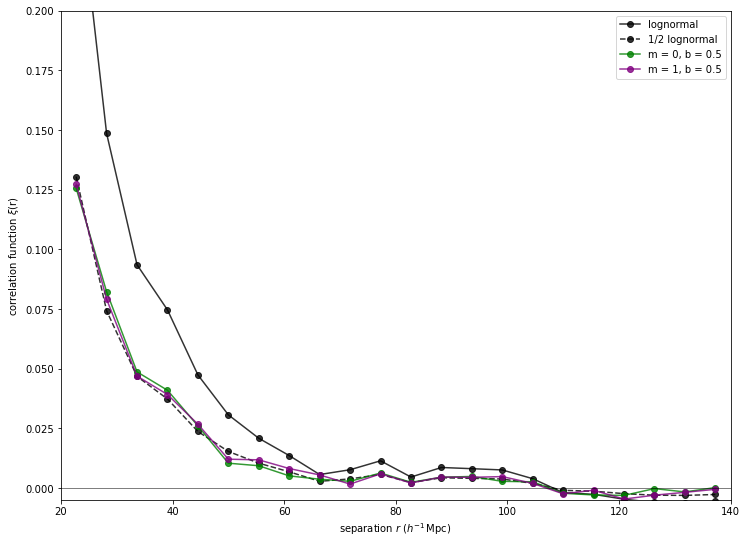

In [13]:
fig, ax = plt.subplots(figsize=(12,9))

plt.plot(ls_ln[0], ls_ln[1], marker='o', color='k', alpha=0.8, label='lognormal')
plt.plot(ls_ln[0], 0.5*ls_ln[1], marker='o', ls='--', color='k', alpha=0.8, label='1/2 lognormal')
plt.plot(ls_m0[0], ls_m0[1], marker='o', color='g', alpha=0.8, label='m = 0, b = 0.5')
plt.plot(ls_m1[0], ls_m1[1], marker='o', color='purple', alpha=0.8, label='m = 1, b = 0.5')

plt.axhline(0, color="k", alpha=0.5, lw=1)
ax.set_xlim(20, 140)
ax.set_ylim(-.005, 0.2)
ax.set_xlabel(r'separation $r$ ($h^{-1}\,$Mpc)')
ax.set_ylabel(r'correlation function $\xi$(r)')
ax.legend()

## CFE (bao iterative)

In [14]:
# lognormal
cfe_ln = np.load(os.path.join(data_dir, f'lognormal/xi/bao_iterative/{cat_tag}/xi_baoiter_cosmoplanck15_test_trrnum_3x_{cat_tag}_rlz{rlz}.npy'), allow_pickle=True)
cfe_ln.shape

(5,)

In [15]:
# m = 0
cfe_m0 = np.loadtxt(os.path.join(data_dir, f'bases/bao_iterative/results/results_gradient_{cat_tag}/final_bases/basis_gradient_{cat_tag}_m-0.000-L_b-0.500_trrnum_3x_rlz{rlz}.dat'))
cfe_m0.shape

(2000, 2)

In [16]:
# m = 1
cfe_m1 = np.loadtxt(os.path.join(data_dir, f'bases/bao_iterative/results/results_gradient_{cat_tag}/final_bases/basis_gradient_{cat_tag}_m-1.000-L_b-0.500_trrnum_3x_rlz{rlz}.dat'))
cfe_m1.shape

(2000, 2)

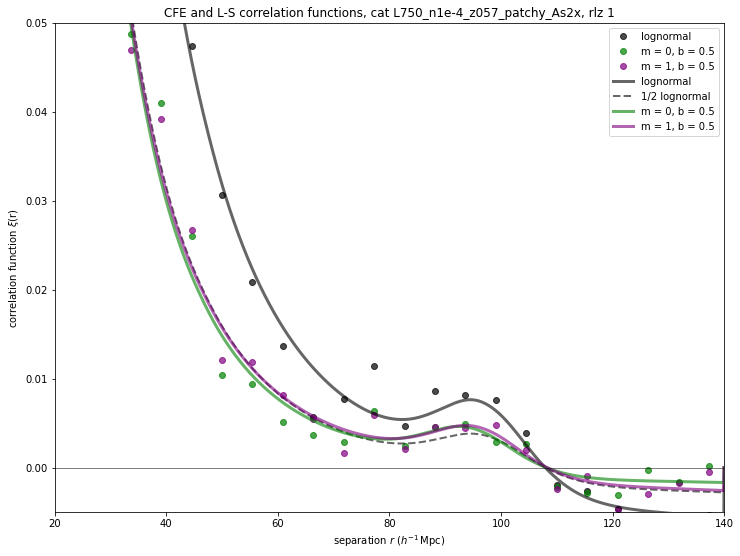

In [17]:
fig, ax = plt.subplots(figsize=(12,9))

alpha_bin=0.7
alpha_c=0.6
lw = 3

# binned
plt.plot(ls_ln[0], ls_ln[1], marker='o', ls='None', color='k', alpha=alpha_bin, label='lognormal')
# plt.plot(ls_ln[0], 0.5*ls_ln[1], marker='o', ls='None', color='k', alpha=0.8, label='1/2 lognormal')
plt.plot(ls_m0[0], ls_m0[1], marker='o', ls='None', color='g', alpha=alpha_bin, label='m = 0, b = 0.5')
plt.plot(ls_m1[0], ls_m1[1], marker='o', ls='None', color='purple', alpha=alpha_bin, label='m = 1, b = 0.5')

# CFE (iterative bao basis)
plt.plot(cfe_ln[0], cfe_ln[1], color='k', alpha=alpha_c, lw=lw, label='lognormal')
plt.plot(cfe_ln[0], 0.5*cfe_ln[1], ls='--', color='k', alpha=alpha_c, lw=2, label='1/2 lognormal')
plt.plot(cfe_m0[:,0], cfe_m0[:,1], color='g', alpha=alpha_c, lw=lw, label='m = 0, b = 0.5')
plt.plot(cfe_m1[:,0], cfe_m1[:,1], color='purple', alpha=alpha_c, lw=lw, label='m = 1, b = 0.5')

plt.axhline(0, color="k", alpha=0.5, lw=1)
ax.set_xlim(20, 140)
ax.set_ylim(-.005, 0.05)
ax.set_xlabel(r'separation $r$ ($h^{-1}\,$Mpc)')
ax.set_ylabel(r'correlation function $\xi$(r)')
ax.set_title(f'CFE and L-S correlation functions, cat {cat_tag}, rlz {rlz}')
ax.legend()

In [18]:
# the correlation functions for the m = 0 and m = 1 mock both correspond to half the amplitude of
#     the cf for the lognormal (clustered) mock; this makes sense since b = 0.5 (mean clustering amplitude)

## understanding True CF amplitudes

In [19]:
# in the case where f_c = sqrt((w_input • x) + b) (which it does everywhere in this mock),
#     we expect that the average of f_c = b
# and that the correlation function xi scales as
#     xi = f_c**2 * xi_DD
# where xi_DD is the correlation function of just the clustered-clustered pairs (which should be the same as
#     the correlation function for the lognormal (clustered) mock, cf_true)

In [20]:
# true correlation function
r_t, cf_true = np.loadtxt(f'/scratch/ksf293/mocks/lognormal/inputs/cat_{cat_tag}_Rh_xi.txt', unpack=True)

In [21]:
# from another notebook (?), we know that the ln correlation function should be the bias^2 * True CF
bias = 2.0
b = 0.5
cf_true_ln = bias**2 * cf_true
cf_true_m0 = cf_true_ln * b
cf_true_m1 = cf_true_m0

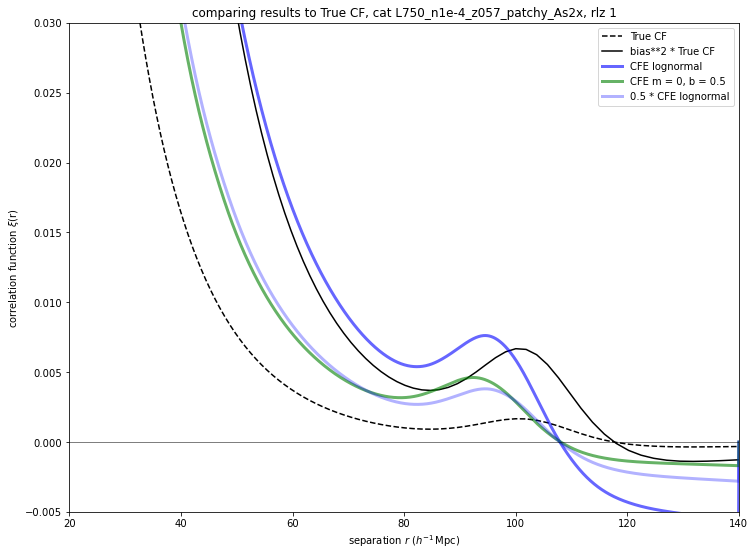

In [23]:
fig, ax = plt.subplots(figsize=(12,9))

plt.plot(r_t, cf_true, color='k', ls='--', label='True CF')
plt.plot(r_t, cf_true_ln, color='k', label='bias**2 * True CF')
plt.plot(cfe_ln[0], cfe_ln[1], color='b', alpha=alpha_c, lw=lw, label='CFE lognormal')
plt.plot(cfe_m0[:,0], cfe_m0[:,1], color='g', alpha=alpha_c, lw=lw, label='CFE m = 0, b = 0.5')

plt.plot(cfe_ln[0], 0.5*cfe_ln[1], color='b', alpha=0.5*alpha_c, lw=lw, label='0.5 * CFE lognormal')

plt.axhline(0, color="k", alpha=0.5, lw=1)
ax.set_xlim(20, 140)
ax.set_ylim(-.005, 0.03)
ax.set_xlabel(r'separation $r$ ($h^{-1}\,$Mpc)')
ax.set_ylabel(r'correlation function $\xi$(r)')
ax.set_title(f'comparing results to True CF, cat {cat_tag}, rlz {rlz}')
ax.legend()

In [24]:
# bao bumps don't match up very well, but the lognormal CFE results seem to match up at least
#     at lower r values with bias^2 * True CF
# and the m = 0 mock seems to be half the amplitude of the lognormal

## average of results

In [25]:
cfe_lns = np.empty((n_mocks, 2000))
cfe_m0s = np.empty((n_mocks, 2000))
cfe_m1s = np.empty((n_mocks, 2000))

for i in range(n_mocks):
    # load lognormal
    cfe_ln = np.load(os.path.join(data_dir, f'lognormal/xi/bao_iterative/{cat_tag}/xi_baoiter_cosmoplanck15_test_trrnum_3x_{cat_tag}_rlz{i}.npy'), allow_pickle=True)
    cfe_lns[i] = cfe_ln[1]
    # load m = 0
    cfe_m0 = np.loadtxt(os.path.join(data_dir, f'bases/bao_iterative/results/results_gradient_{cat_tag}/final_bases/basis_gradient_{cat_tag}_m-0.000-L_b-0.500_trrnum_3x_rlz{i}.dat'))
    cfe_m0s[i] = cfe_m0[:,1]
    # load m = 1
    cfe_m1 = np.loadtxt(os.path.join(data_dir, f'bases/bao_iterative/results/results_gradient_{cat_tag}/final_bases/basis_gradient_{cat_tag}_m-1.000-L_b-0.500_trrnum_3x_rlz{i}.dat'))
    cfe_m1s[i] = cfe_m1[:,1]

In [26]:
def get_cfe_vals(mocks):
    avg = np.mean(mocks, axis=0)
    std = np.std(mocks, axis=0)
    error_regions = np.array([avg-std, avg+std])
    
    return avg, error_regions

In [27]:
avg_cfe_lns, err_lns = get_cfe_vals(cfe_lns)
avg_cfe_m0s, err_m0s = get_cfe_vals(cfe_m0s)
avg_cfe_m1s, err_m1s = get_cfe_vals(cfe_m1s)

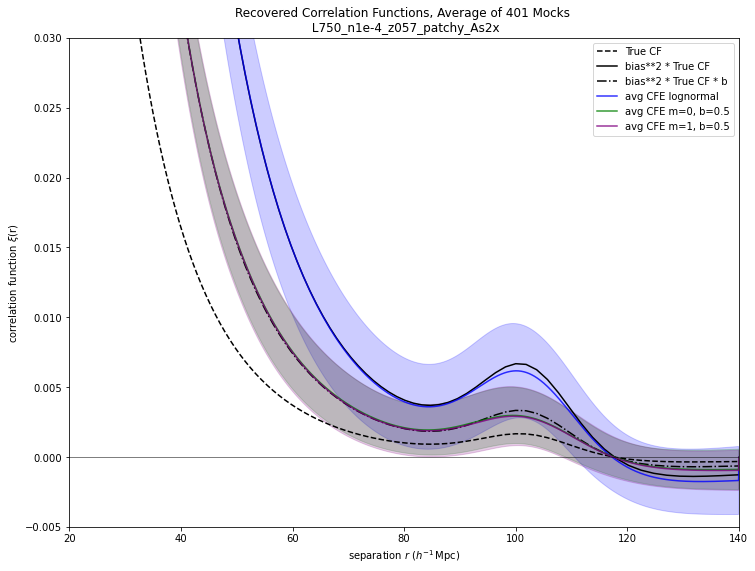

In [29]:
fig, ax = plt.subplots(figsize=(12,9))

r_base = cfe_ln[0]

# True CF
plt.plot(r_t, cf_true, color='k', ls='--', label='True CF')
plt.plot(r_t, cf_true_ln, color='k', label='bias**2 * True CF')
plt.plot(r_t, cf_true_m0, color='k', ls='-.', label='bias**2 * True CF * b')

# suave
ax.plot(r_base, avg_cfe_lns, color='b', alpha=0.8, label='avg CFE lognormal')
ax.plot(r_base, avg_cfe_m0s, color='g', alpha=0.8, label='avg CFE m=0, b=0.5')
ax.plot(r_base, avg_cfe_m1s, color='purple', alpha=0.8, label='avg CFE m=1, b=0.5')
ax.fill_between(r_base, err_lns[0], err_lns[1], color='b', alpha=0.2)
ax.fill_between(r_base, err_m0s[0], err_m0s[1], color='g', alpha=0.2)
ax.fill_between(r_base, err_m1s[0], err_m1s[1], color='purple', alpha=0.2)

ax.set_xlim(20, 140)
ax.set_ylim(-.005, 0.03)
plt.axhline(0, color="k", alpha=0.5, lw=1)
ax.set_xlabel(r'separation $r$ ($h^{-1}\,$Mpc)')
ax.set_ylabel(r'correlation function $\xi$(r)')
ax.set_title(f'Recovered Correlation Functions, Average of 401 Mocks \n {cat_tag}')
plt.legend()